In [ ]:
# !pip install fbprophet

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

## 데이터 로드

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/미스터리튜브_stat.csv'
df = pd.read_csv(path, header=0)
print(df.shape)
print(df.head())

(369, 6)
   searchDate  dailyViewCount  ...  favorablePercent  activePercent
0  2020-02-14           19743  ...                 0             54
1  2020-02-15           23929  ...                 0             57
2  2020-02-16           26015  ...                 0             58
3  2020-02-17           25312  ...                 0             58
4  2020-02-18           25040  ...                 0             57

[5 rows x 6 columns]


## 불필요한 컬럼 삭제(단변량 예측)

In [ ]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [ ]:
# 데이터의 마지막 날짜와 그 다음 날짜를 저장
lastday = df['searchDate'][len(df)-1]
nextday = str(pd.date_range(lastday, periods=2)[1])[:10]
print("마지막 날짜 : {}, 예측 시작 날짜 : {}".format(lastday, nextday))

마지막 날짜 : 2021-02-16, 예측 시작 날짜 : 2021-02-17


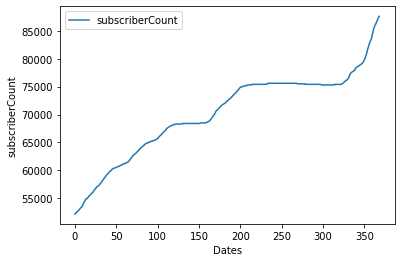

In [ ]:
df.plot()
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.show()

## 모델에 맞게 데이터 전처리

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']
# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
preday = 30

In [ ]:
fast_10day = str(pd.date_range(df['ds'][len(df)-preday], periods=preday)[0])[:10]

In [ ]:
y_true = df['y'][-preday:].values

# train set 마지막 preday일 날짜 예측 검증
last_10day = list()
for i in range(preday):
    last_10day.append(str(pd.date_range(fast_10day, periods=preday)[i])[:10])
last_10day = pd.DataFrame(last_10day, columns = ['ds'])
last_10day['ds']= pd.to_datetime(last_10day['ds'])

In [ ]:
from fbprophet import Prophet

# 모델 생성
model = Prophet()
# 모델 학습
model.fit(df)

forecast = model.predict(last_10day)
y_pred = forecast['yhat'].values

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


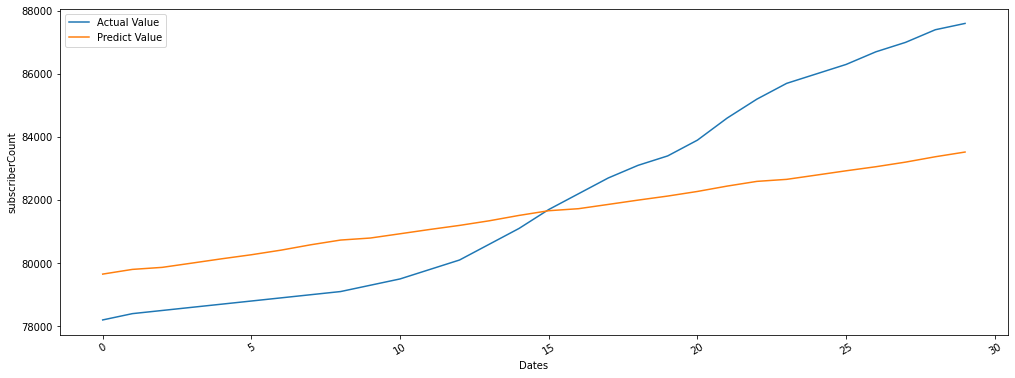

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(y_true, label="Actual Value")
plt.plot(y_pred, label="Predict Value")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('prophet - MAE 값 : %.3f' % mae)

prophet - MAE 값 : 1832.925


## 예측할 일 수 입력

In [ ]:
# 예측할 날짜 일 수
predict_day = 9
# 예측 날짜 문자열 리스트 생성
pred_date = list()
for i in range(predict_day):
    pred_date.append(str(pd.date_range(nextday, periods=predict_day)[i])[:10])

# 날짜 리스트를 데이터 프레임 화
pred_date = pd.DataFrame(pred_date, columns = ['ds'])
# 문자열을 날짜 데이터 형식으로 변환
pred_date['ds']= pd.to_datetime(pred_date['ds'])

## 시각화

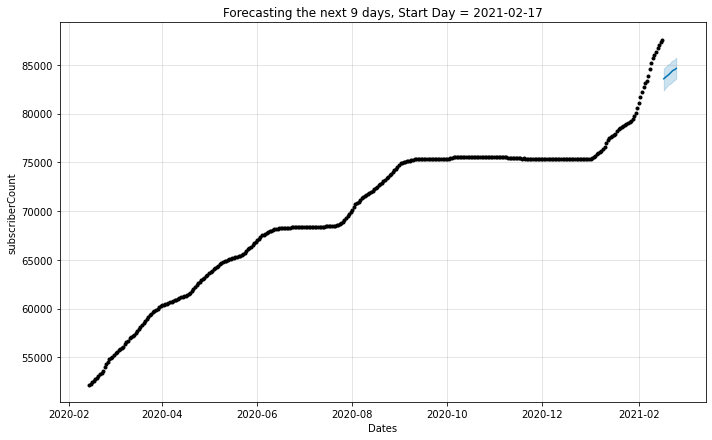

In [ ]:
# 미래 예측
forecast = model.predict(pred_date)
model.plot(forecast)
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {predict_day} days, Start Day = {nextday}")
plt.show()

In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df['ds'][len(df)-1], periods=2)[1])[:10]

step = 9
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

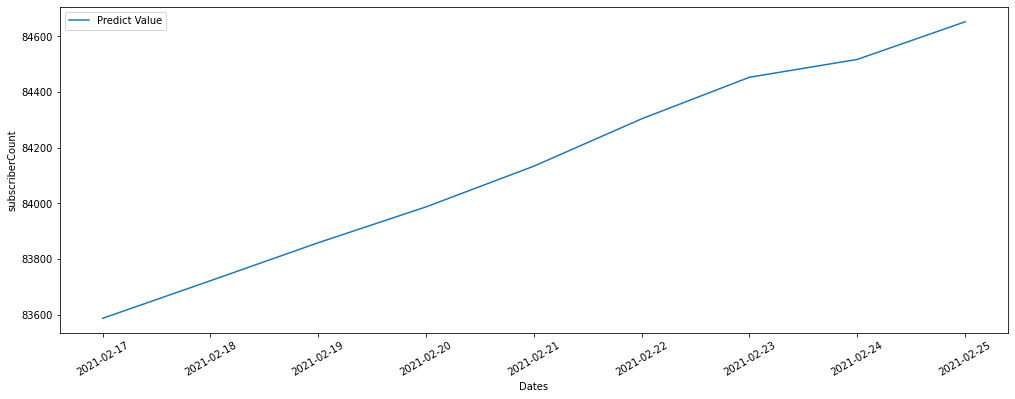

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(forecast['yhat'], label="Predict Value")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.legend()
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-17,83607.734713,82378.065620,84636.809826,83607.734713,83607.734713,-20.902266,-20.902266,-20.902266,-20.902266,-20.902266,-20.902266,0.0,0.0,0.0,83586.832447
1,2021-02-18,83740.604863,82631.040576,84762.855044,83740.604863,83740.604863,-18.602286,-18.602286,-18.602286,-18.602286,-18.602286,-18.602286,0.0,0.0,0.0,83722.002577
2,2021-02-19,83873.475012,82774.817447,84936.919113,83872.931109,83873.475012,-15.013516,-15.013516,-15.013516,-15.013516,-15.013516,-15.013516,0.0,0.0,0.0,83858.461496
3,2021-02-20,84006.345162,83012.853123,85085.306475,83995.796782,84009.155176,-19.150311,-19.150311,-19.150311,-19.150311,-19.150311,-19.150311,0.0,0.0,0.0,83987.194850
4,2021-02-21,84139.215311,83047.033373,85161.365309,84116.903870,84151.689437,-5.750988,-5.750988,-5.750988,-5.750988,-5.750988,-5.750988,0.0,0.0,0.0,84133.464324
5,2021-02-22,84272.085461,83176.665766,85390.086822,84228.680500,84298.925446,31.478257,31.478257,31.478257,31.478257,31.478257,31.478257,0.0,0.0,0.0,84303.563718
6,2021-02-23,84404.955610,83355.119172,85483.795133,84339.121922,84447.647098,47.941111,47.941111,47.941111,47.941111,47.941111,47.941111,0.0,0.0,0.0,84452.896721
7,2021-02-24,84537.825760,83460.580548,85537.829746,84452.921820,84606.878998,-20.902266,-20.902266,-20.902266,-20.902266,-20.902266,-20.902266,0.0,0.0,0.0,84516.923493
8,2021-02-25,84670.695909,83593.771235,85752.807785,84559.090477,84768.466653,-18.602286,-18.602286,-18.602286,-18.602286,-18.602286,-18.602286,0.0,0.0,0.0,84652.093623


In [ ]:
# yhat은 미래 예측 값, yhat_lower은 예측 하한값, yhat_upper은 예측 상한값
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds          yhat    yhat_lower    yhat_upper
0 2021-02-17  83586.832447  82378.065620  84636.809826
1 2021-02-18  83722.002577  82631.040576  84762.855044
2 2021-02-19  83858.461496  82774.817447  84936.919113
3 2021-02-20  83987.194850  83012.853123  85085.306475
4 2021-02-21  84133.464324  83047.033373  85161.365309
5 2021-02-22  84303.563718  83176.665766  85390.086822
6 2021-02-23  84452.896721  83355.119172  85483.795133
7 2021-02-24  84516.923493  83460.580548  85537.829746
8 2021-02-25  84652.093623  83593.771235  85752.807785


In [ ]:
arr = forecast['yhat']

In [ ]:
int(arr[0])

83586

In [ ]:
for i in arr :
  print(int(i))

83586
83722
83858
83987
84133
84303
84452
84516
84652
